# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I. Data Exploration

In [29]:
df = pd.read_csv('./product_sales.csv')

In [30]:
df.shape

(15000, 8)

In [31]:
df.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [32]:
df.info(), df.isna().sum(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


(None,
 week                    0
 sales_method            0
 customer_id             0
 nb_sold                 0
 revenue              1074
 years_as_customer       0
 nb_site_visits          0
 state                   0
 dtype: int64,
    week  sales_method  ... nb_site_visits      state
 0     2         Email  ...             24    Arizona
 1     6  Email + Call  ...             28     Kansas
 2     5          Call  ...             26  Wisconsin
 3     4         Email  ...             25    Indiana
 4     3         Email  ...             28   Illinois
 
 [5 rows x 8 columns])

**Comment:**  From the result, there is 1 attribute that have missing values: 'revenue'. Solution to handle this problem will be in Data Processing.

In [33]:
#Checking data in 'sales_method'
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

**Comment:** Then, we will check value at 'sales_method' and know there are wrong formats of data. We will correct it at Data Processing

In [34]:
#Checking data in 'years_as_customer'
df['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [35]:
df[df['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


**Comment:** Because the company have been found from 1984 and we are analyzing in 2025, then all rows having 'years_as_customer' greater than 41 will be considered in Data Processing.

In [36]:
# Checking states in dataset
df['state'].value_counts().sort_index()

Alabama            214
Alaska              40
Arizona            321
Arkansas           132
California        1872
Colorado           230
Connecticut        179
Delaware            34
Florida            904
Georgia            489
Hawaii              72
Idaho               62
Illinois           617
Indiana            354
Iowa               165
Kansas             142
Kentucky           213
Louisiana          230
Maine               63
Maryland           263
Massachusetts      294
Michigan           498
Minnesota          245
Mississippi        139
Missouri           311
Montana             45
Nebraska            91
Nevada             102
New Hampshire       53
New Jersey         434
New Mexico          84
New York           965
North Carolina     459
North Dakota        30
Ohio               566
Oklahoma           196
Oregon             229
Pennsylvania       598
Rhode Island        43
South Carolina     224
South Dakota        41
Tennessee          340
Texas             1187
Utah       

In [37]:
df.state.nunique()

50

# II. Data Processing.

## 1. Handling missing values at Revenue.

In [38]:
print('Mising rate of Revenue attribute: ' + str(df['revenue'].isna().sum()/df.shape[0]))

Mising rate of Revenue attribute: 0.0716


*Comment:* From the previous investigation, I have found that 'Revenue' has missing values, with 1074 comprising around 7% of the value in the data. The solution to solve this problem is to use mean imputation to retain all rows.

In [39]:
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## 2. Handing wrong format of data in 'sales_method'

*Comment:* In the company document, we have been informed that there are three main methods: Email, Call, Email and Call. However, in data exploration, we have found that values in 'sales_method' column have five values, which have the wrong format. As a result, we will format the value in this attribute. 

In [40]:
methods = df['sales_method'].unique()
df.loc[df['sales_method'] == methods[3],'sales_method'] = methods[1]
df.loc[df['sales_method'] == methods[4],'sales_method'] = methods[0]

In [41]:
methods = df['sales_method'].unique()
print(methods)

['Email' 'Email + Call' 'Call']


## 3. Deleting all row having years_as_customer which is greater than 41

In [42]:
df.drop(df[df['years_as_customer'] > 41].index, axis=0, inplace=True)

# III. Data Analysis 

## 1. How many customers were there for each approach?

In [43]:
customers_each_approach = df.groupby('sales_method')['customer_id'].count()
print(customers_each_approach.values)

[4961 7465 2572]


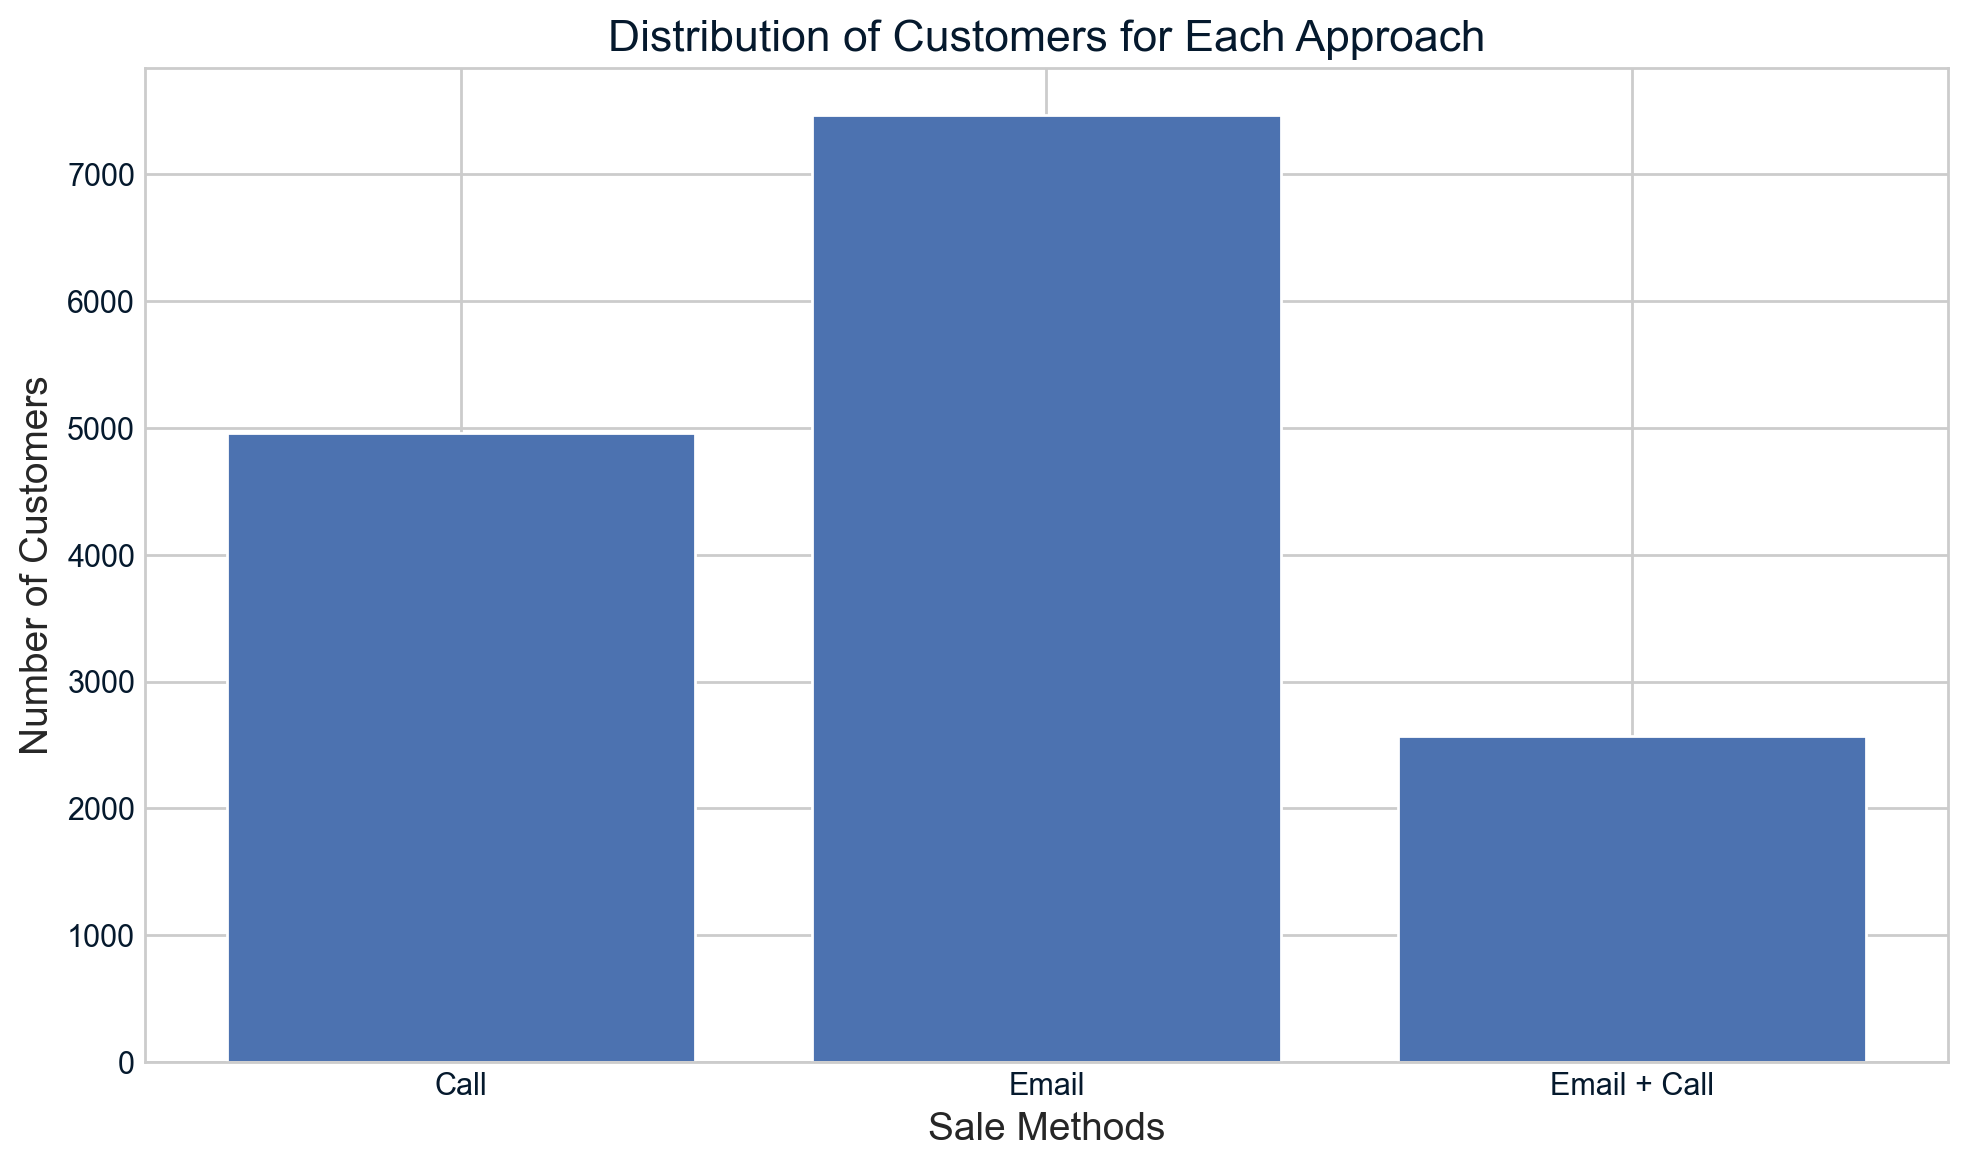

In [44]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

plt.bar(customers_each_approach.index, customers_each_approach.values)
plt.xlabel('Sale Methods', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Distribution of Customers for Each Approach', fontsize=16)

plt.tight_layout()
plt.show()

__Comment:__ There are the highest number of customers in Email method, recorded at over 7000, followed by Call method and Email + Call method, at around 5000 and 2500, respectively.

## 2. What does the spread of the revenue look like overall? And for each method?

In [45]:
revenue_by_method = [df[df['sales_method'] == method]['revenue'] for method in methods]
# print(revenue_by_method)
from scipy.stats import f_oneway, ttest_ind
anova_result = f_oneway(*revenue_by_method)

# Print ANOVA results
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in revenue trends between the methods.")
else:
    print("There is no statistically significant difference in revenue trends between the methods.")

ANOVA Test Results:
F-statistic: 32241.143748373015
P-value: 0.0
There is a statistically significant difference in revenue trends between the methods.


__Comment:__ 
- The value of F-statistic have shown us a significant variation in revenue trends between the different methods. 
- In terms of P-value, 0 is less than any common significance level, in this case I have chosen 0.05, implicating that the differences in revenue trends among the methods are statistically significant.

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['revenue'], groups=df['sales_method'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  Call        Email  47.6075   0.0  46.7551    48.46   True
  Call Email + Call   122.19   0.0 121.0592 123.3207   True
 Email Email + Call  74.5824   0.0  73.5184  75.6465   True
-----------------------------------------------------------


__Comment:__ From this post-hoc test, we can conclude some things:
- The revenue from the Email method is significantly higher than the Call method.
- The revenue from the Email + Call method is significantly higher than the Call method.
-  The revenue from the Email + Call method is significantly higher than the Email method.

-> Conclusion: All pairwise comparisons show statistically significant differences in revenue, as indicated by the p-adj value of 0.0 and the rejection of the null hypothesis (reject = True). This confirms that the Email + Call method generates significantly higher revenue compared to both the Call and Email methods, and the Email method also outperforms the Call method.

In [47]:
df['revenue'].describe()

count    14998.000000
mean        93.937622
std         45.707135
min         32.540000
25%         53.042500
50%         91.865000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

__Comment:__ The range of the 'revenue' attribute spans from 32.54 to 238.32, with a gap of approximately 200. Therefore, I chose 20 bins to visualize it more effectively.

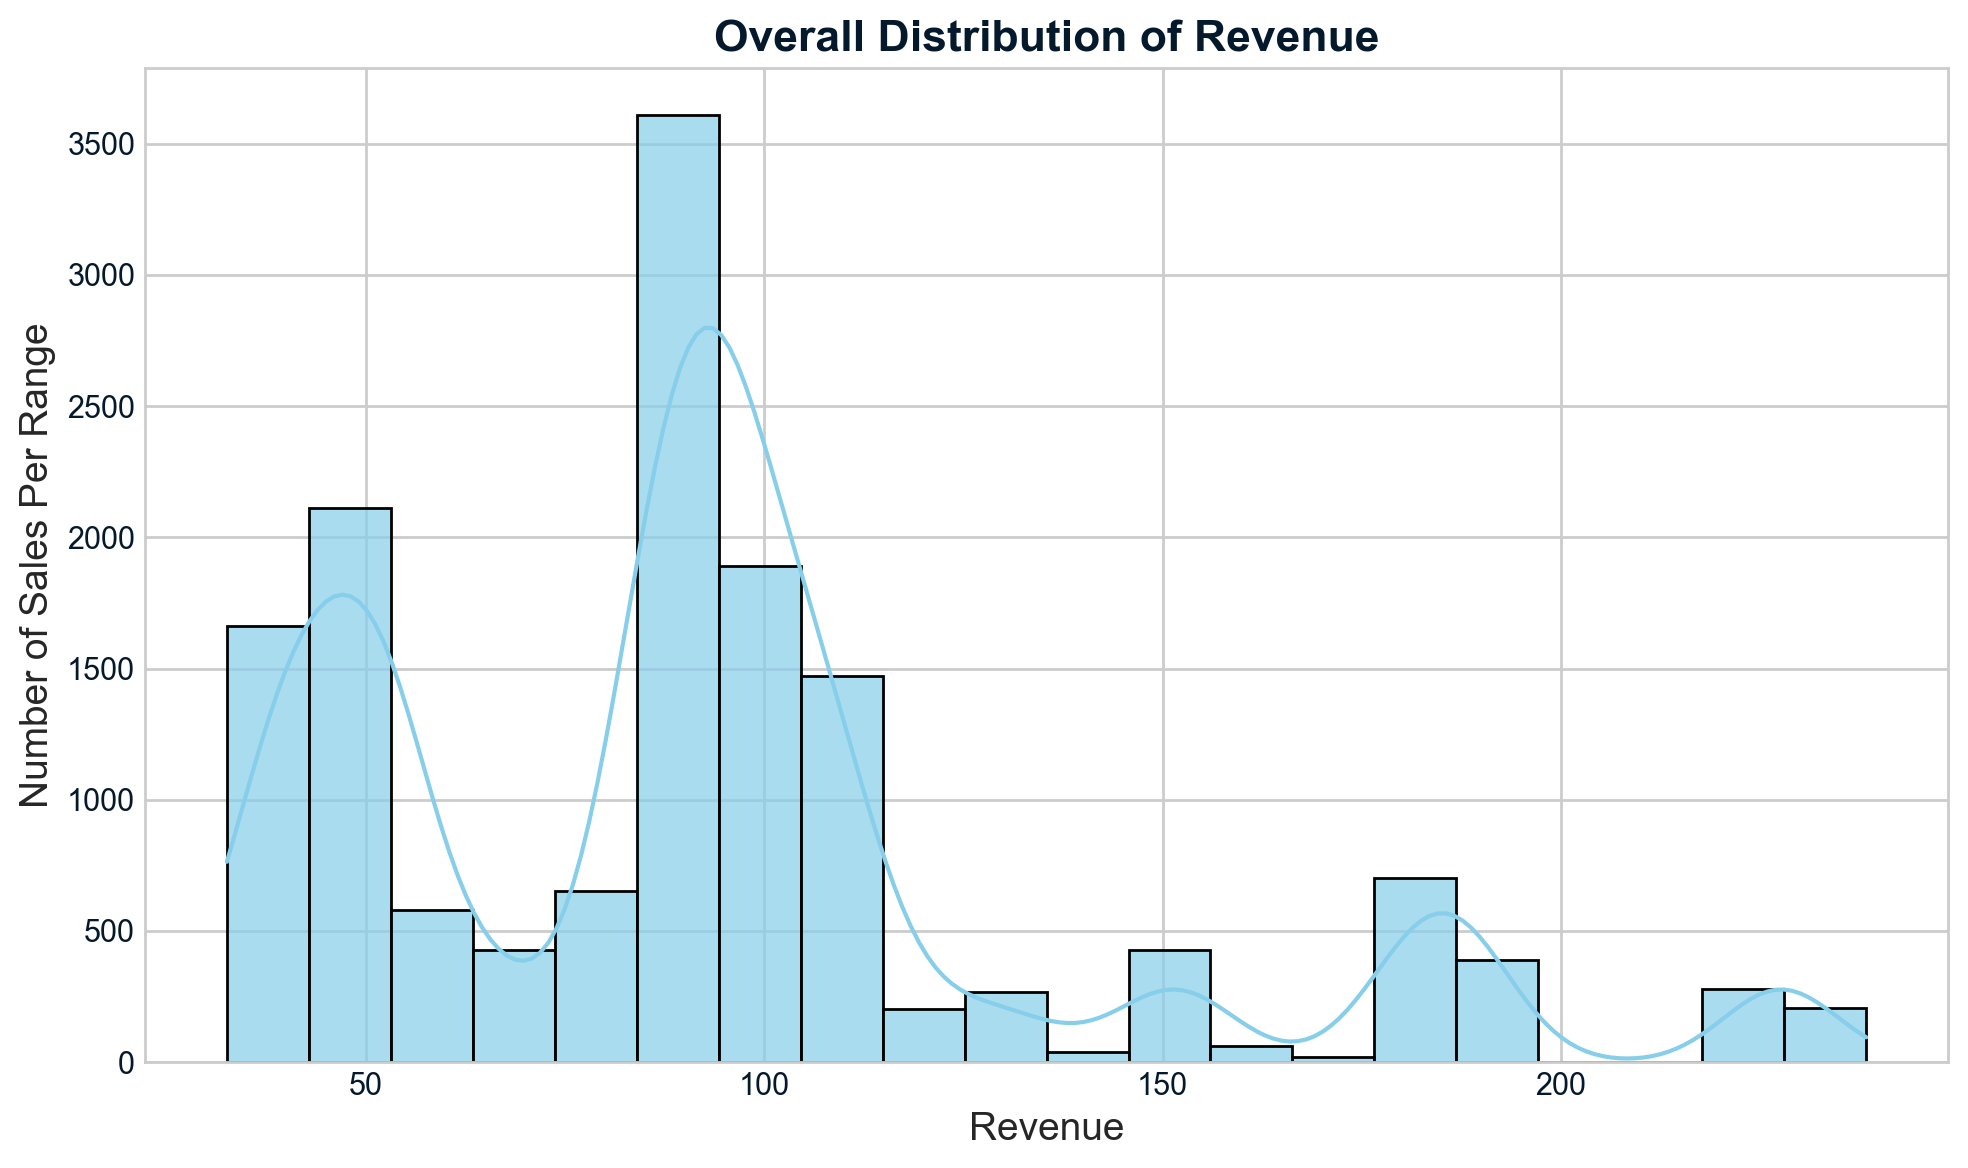

In [48]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(df['revenue'], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Overall Distribution of Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Number of Sales Per Range', fontsize=14)

plt.tight_layout()
plt.show()

__Comment:__ From the histogram, the graph appears bimodal with two peaks: one in the range of 32 to around 60, and another in the range of 70 to 110. The distribution shows the highest concentration in the second range.

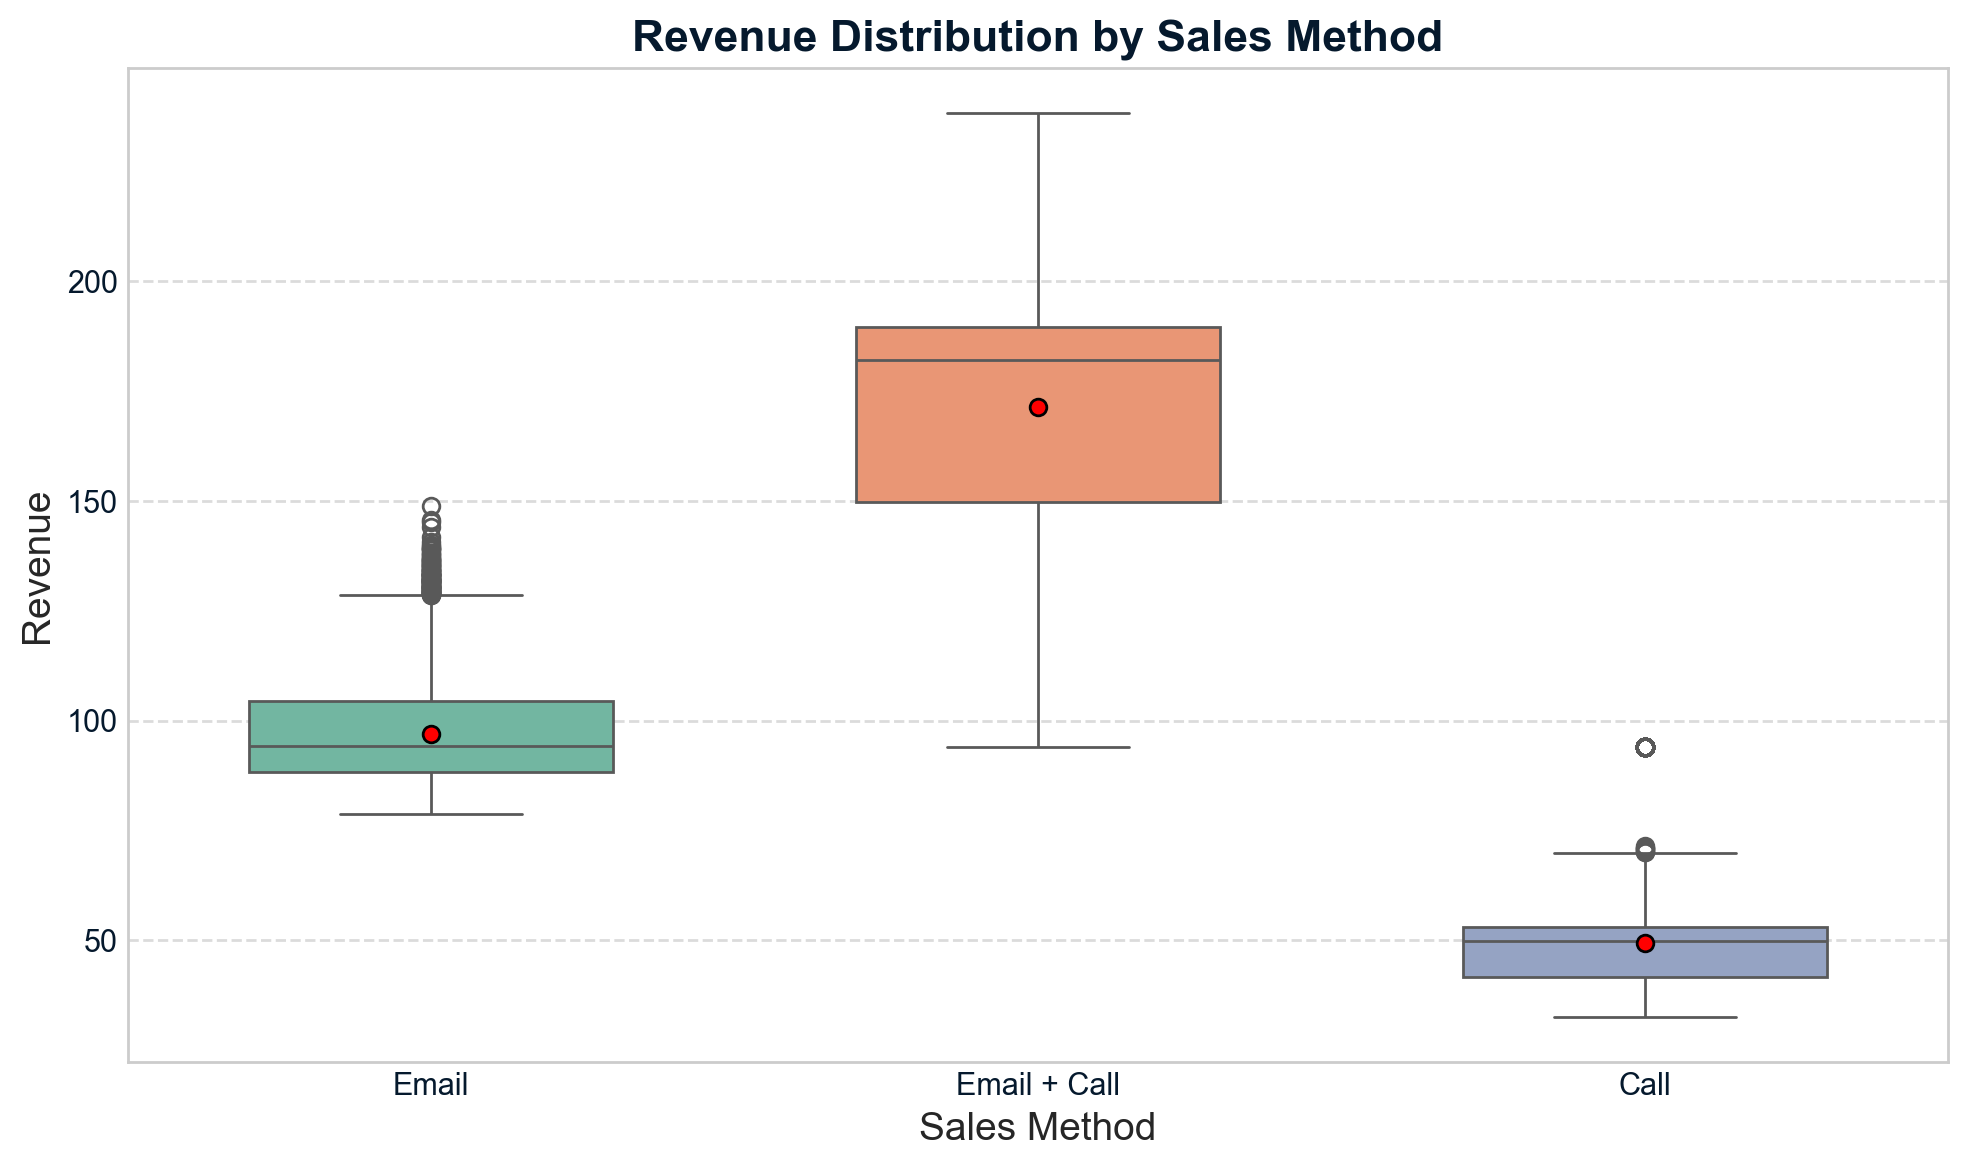

In [49]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2', width=0.6, showmeans=True, 
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

plt.title('Revenue Distribution by Sales Method', fontsize=16, fontweight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

__Comment:__ 
- Email: Median revenue is around 100, with a compact interquartile range and several outliers above 150, indicating occasional higher revenue values.
- Email + Call: Median revenue is the highest, approximately 150, with the widest spread, showing a large variability in revenue but no extreme outliers.
- Call: Median revenue is the lowest, around 50, with a narrow interquartile range and a few outliers above 70, indicating a generally consistent but lower revenue performance.

-> Conclusion: The Email + Call method appears to be the most effective in driving higher revenues, albeit with greater variability, while the Call method seems less effective with lower revenues and minimal variability.

## 3. Was there any difference in revenue over time for each of the methods?

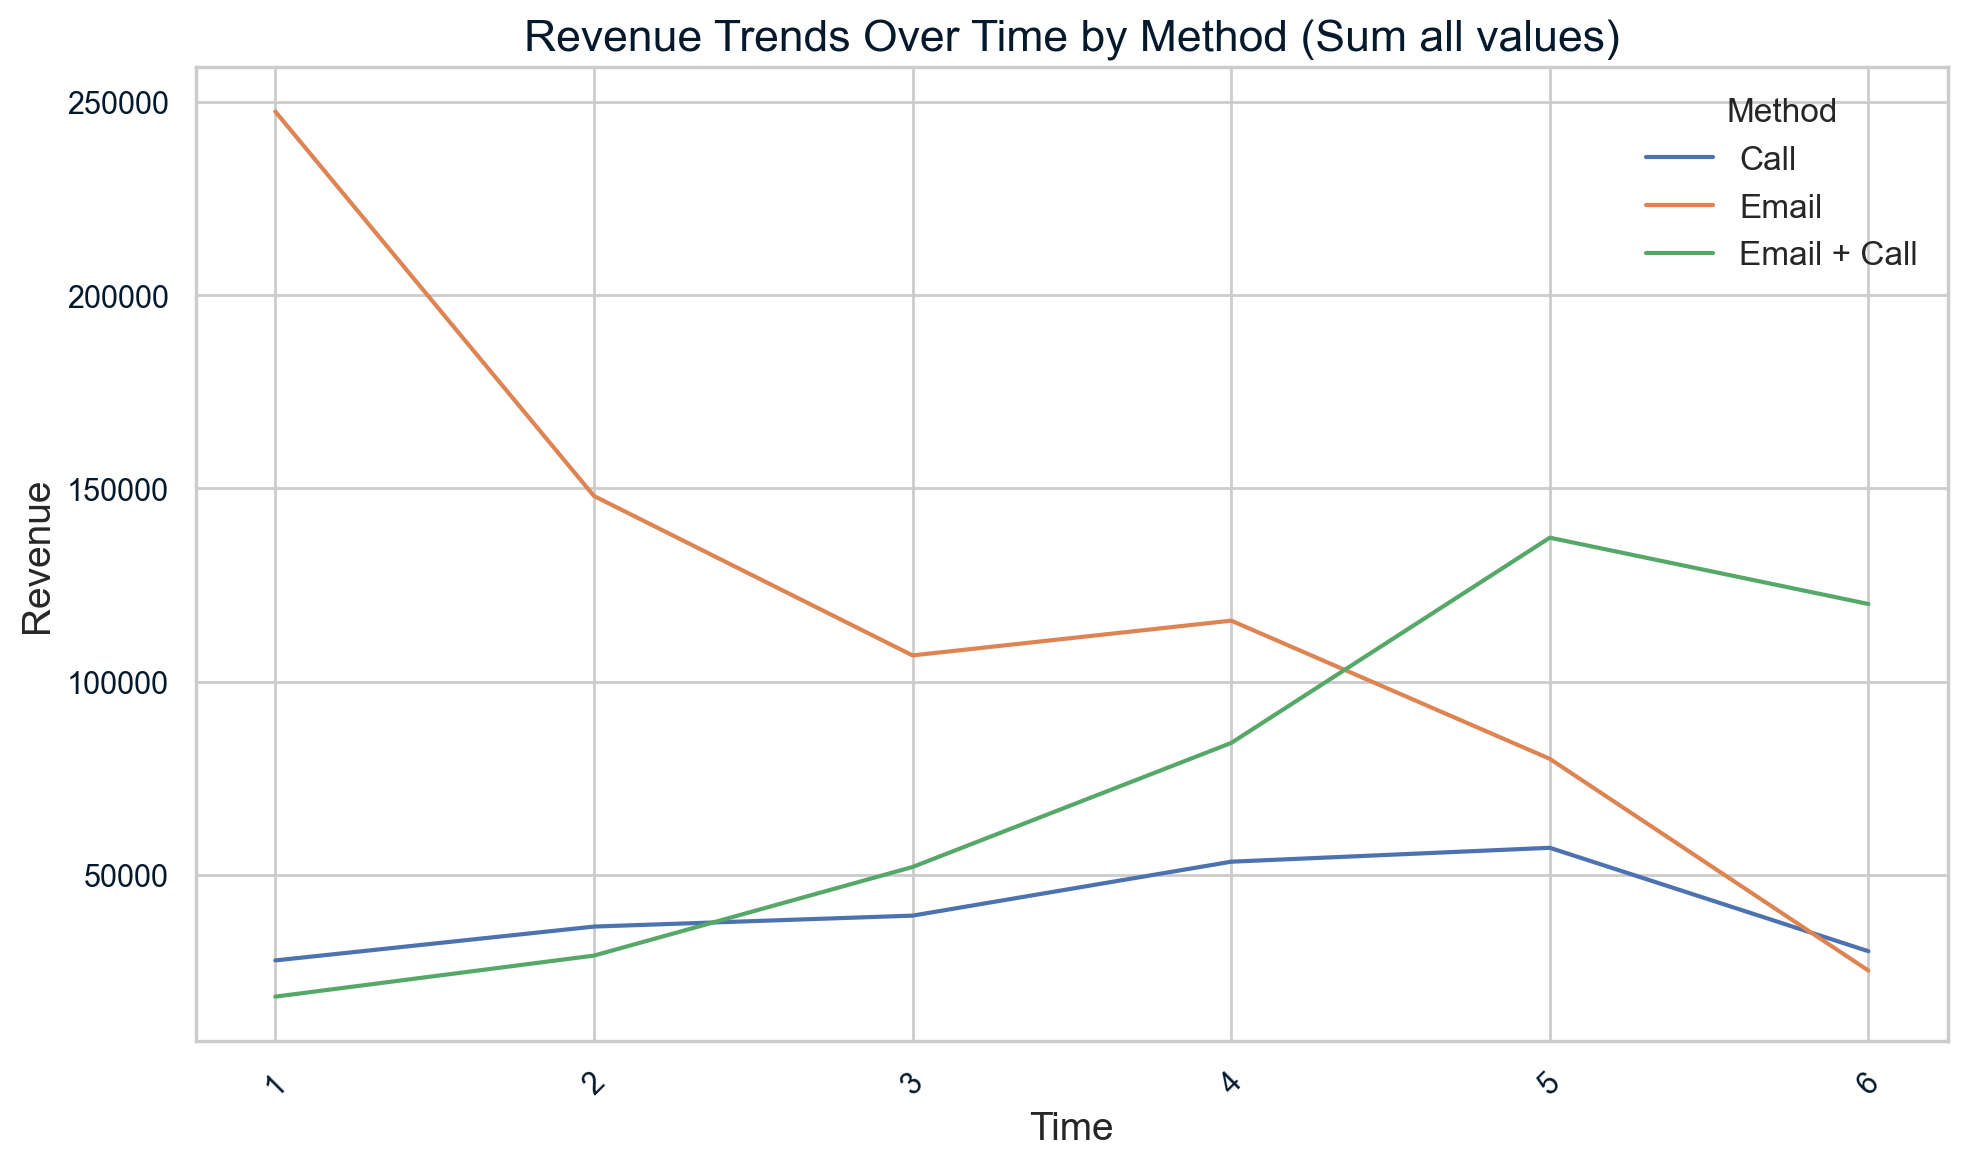

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

over_time_revenue_per_approach = df.groupby(['week','sales_method'])['revenue'].sum().reset_index()
sns.lineplot(x='week', y ='revenue', hue='sales_method', data=over_time_revenue_per_approach)


plt.title('Revenue Trends Over Time by Method (Sum all values)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(title='Method', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

__Comment:__ The first graph depicts the total revenue trends over time for the three sales methods: Call, Email, and Email + Call. Initially, the Email method dominates with the highest total revenue, peaking at around 250,000. However, its revenue declines sharply over time and converges with the other methods at the later stages. In contrast, the Call method starts with the lowest total revenue, but it exhibits a consistent and gradual increase over time, indicating steady growth. Meanwhile, the Email + Call method starts below the Email method but steadily rises, surpassing the Email method by the midpoint and peaking around the fifth period.

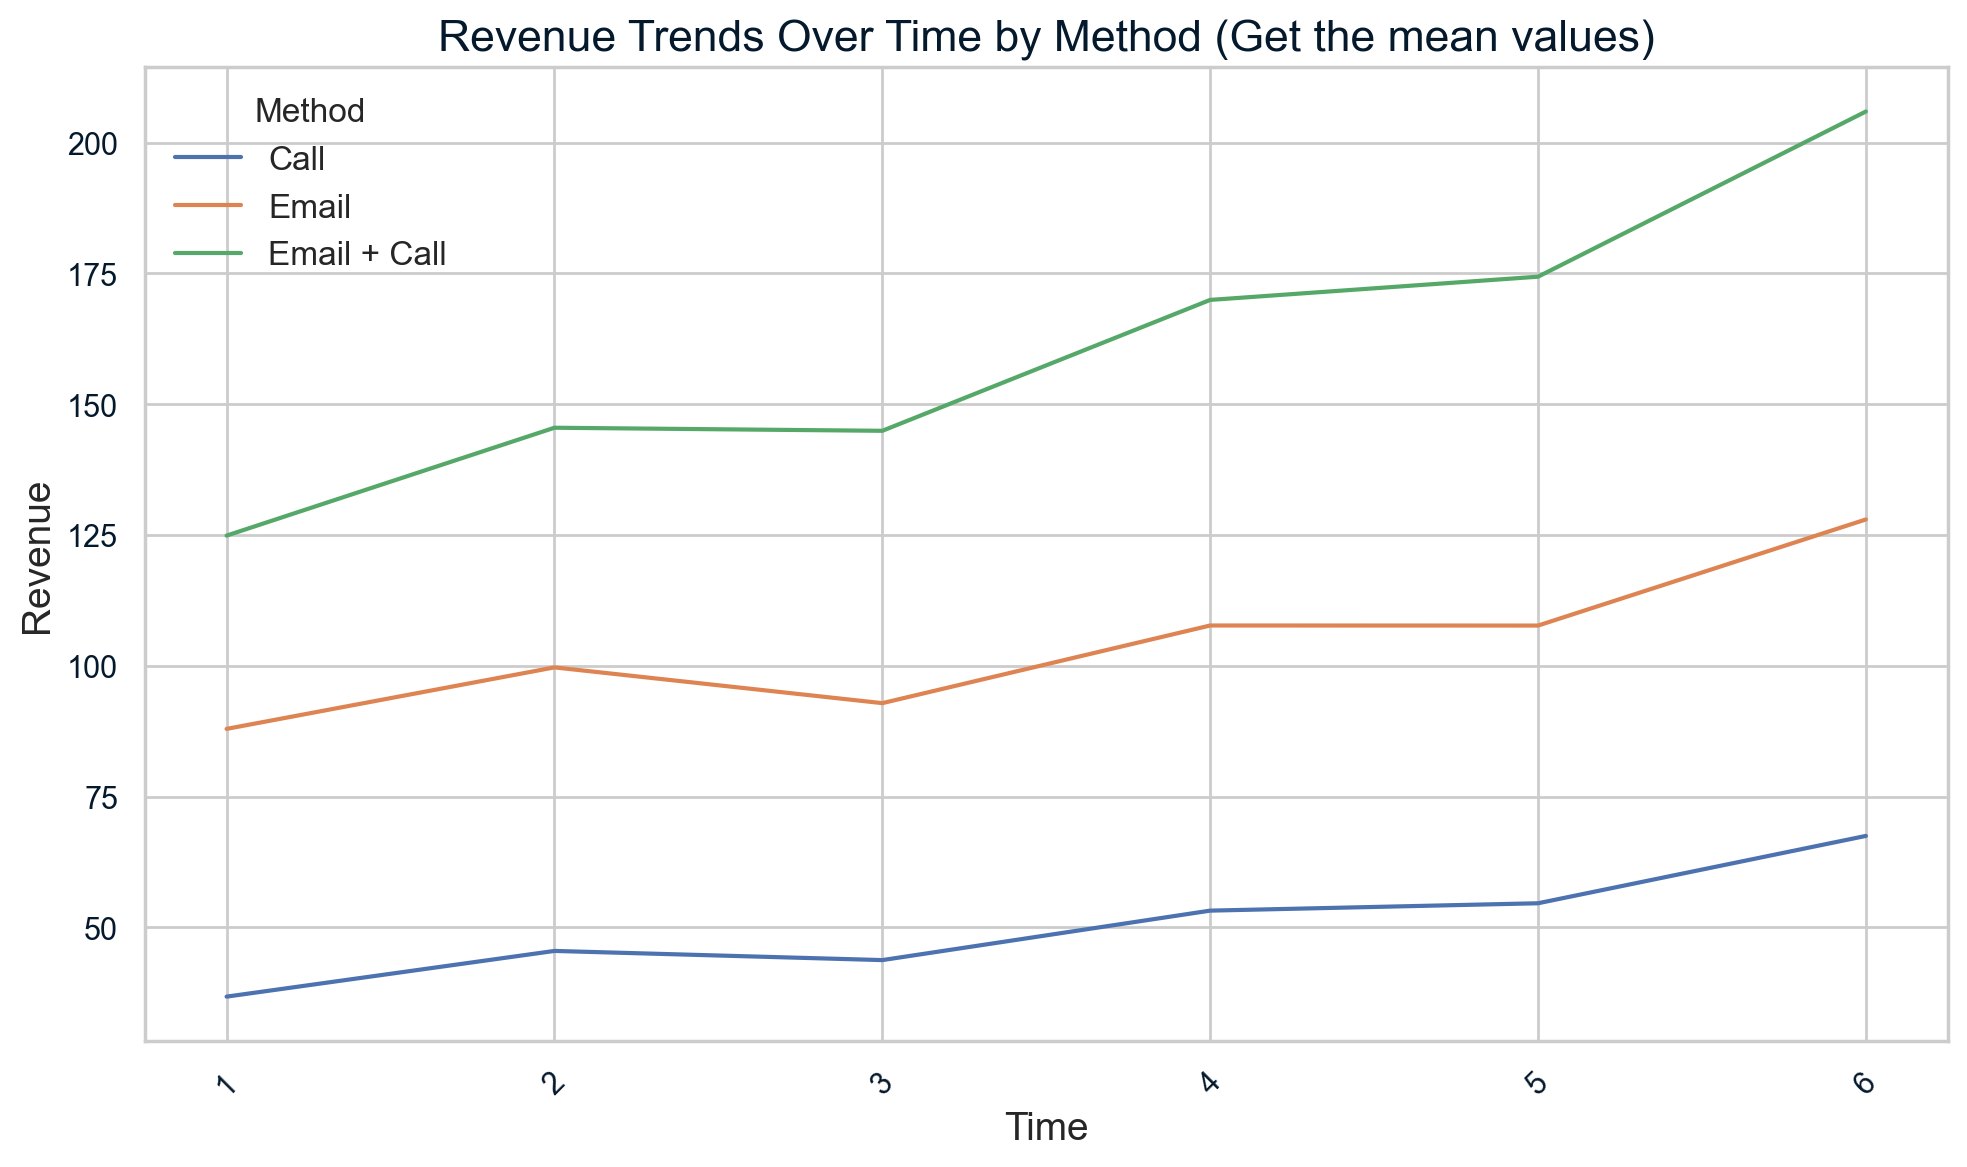

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

over_time_revenue_per_approach = df.groupby(['week','sales_method'])['revenue'].mean().reset_index()
sns.lineplot(x='week', y ='revenue', hue='sales_method', data=over_time_revenue_per_approach)


plt.title('Revenue Trends Over Time by Method (Get the mean values)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(title='Method', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

__Comment:__ The second graph shows the average revenue trends over time for the same sales methods. Unlike the total revenue graph, this chart highlights the differences in performance efficiency. The Email + Call method consistently maintains the highest average revenue throughout the timeline, showing steady growth with a notable increase in the later periods. The Email method starts with a relatively high average revenue but flattens in the middle and only rises slightly towards the end, indicating stagnation in efficiency. The Call method begins with the lowest average revenue but shows a steady upward trend, albeit at a slower rate compared to the other methods.

## 4. Based on the data, which method would you recommend we continue to use?

- Based on the data and charts provided, I recommend that the organization moves away from relying solely on the calling approach, as it consistently delivers the weakest results among all sales methods. 
- Additionally, the calling method is highly time-intensive, with an average call duration of approximately 30 minutes per customer. Instead, calls could be supplemented with emails that provide key product insights, which require significantly less effort from the team. Therefore, I suggest the team prioritizes and invests more heavily in the Email + Call approach.
- As demonstrated in the graphs, the Email + Call strategy performs exceptionally well and should be the organization's primary focus. This approach not only ensures relevance and timeliness but also reduces the time spent on customer engagement. 
- The upward trend in both average weekly revenue and total weekly revenue highlights the strong ROI (Return on Investment) of the Email + Call method. If feasible, the business should focus primarily on the Email + Call strategy, with Email-only as a secondary option, while avoiding the Call-only approach due to its poor performance and time demands. 
- Notably, the call time for the Email + Call method averages just 10 minutes, compared to the 30 minutes for Call-only, making it a far more efficient choice.

# IV.  A metric for the business to monitor

In [52]:
pivot_table = df.pivot_table(
    values='revenue', 
    index='week', 
    columns='sales_method', 
    aggfunc=['mean', 'median']
)

styled_table = pivot_table.style.background_gradient(cmap='coolwarm')
styled_table

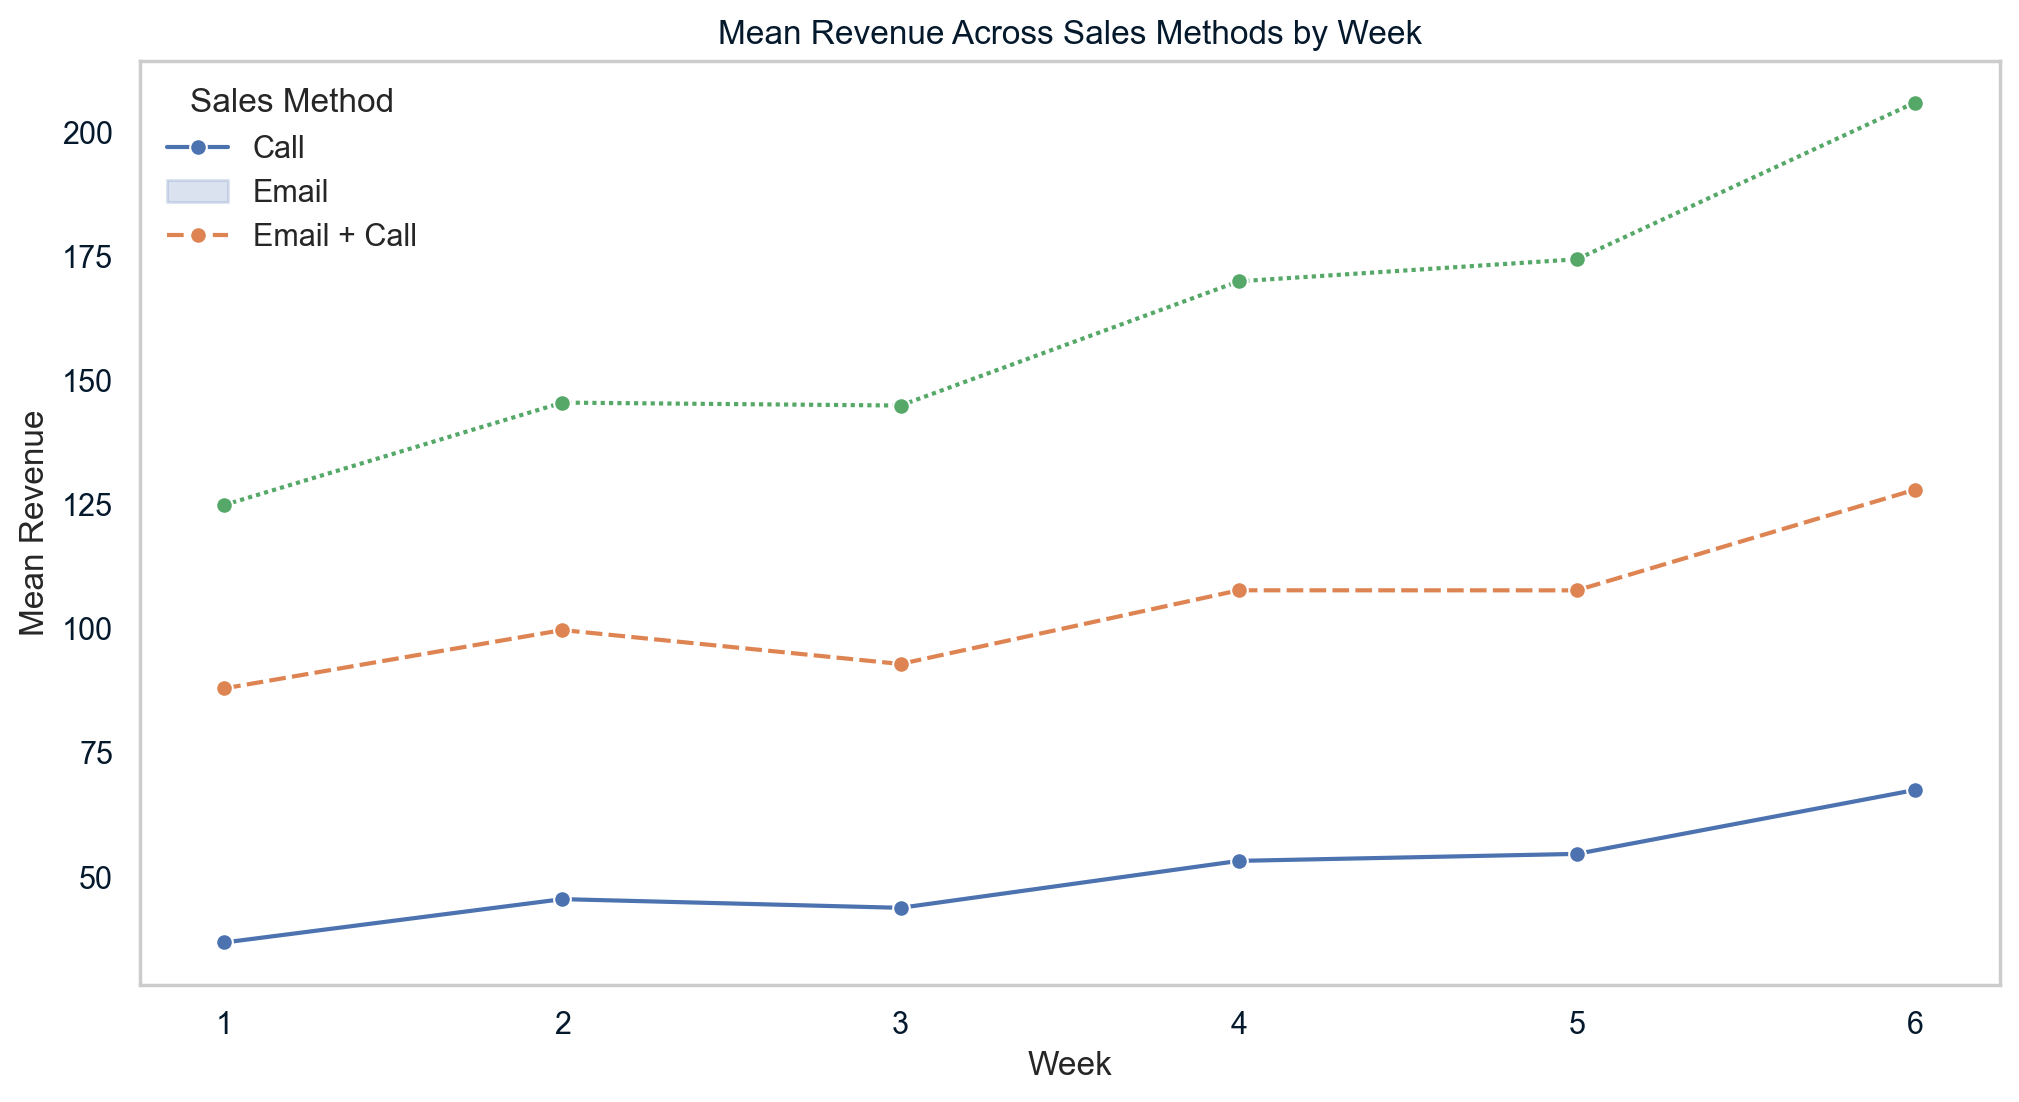

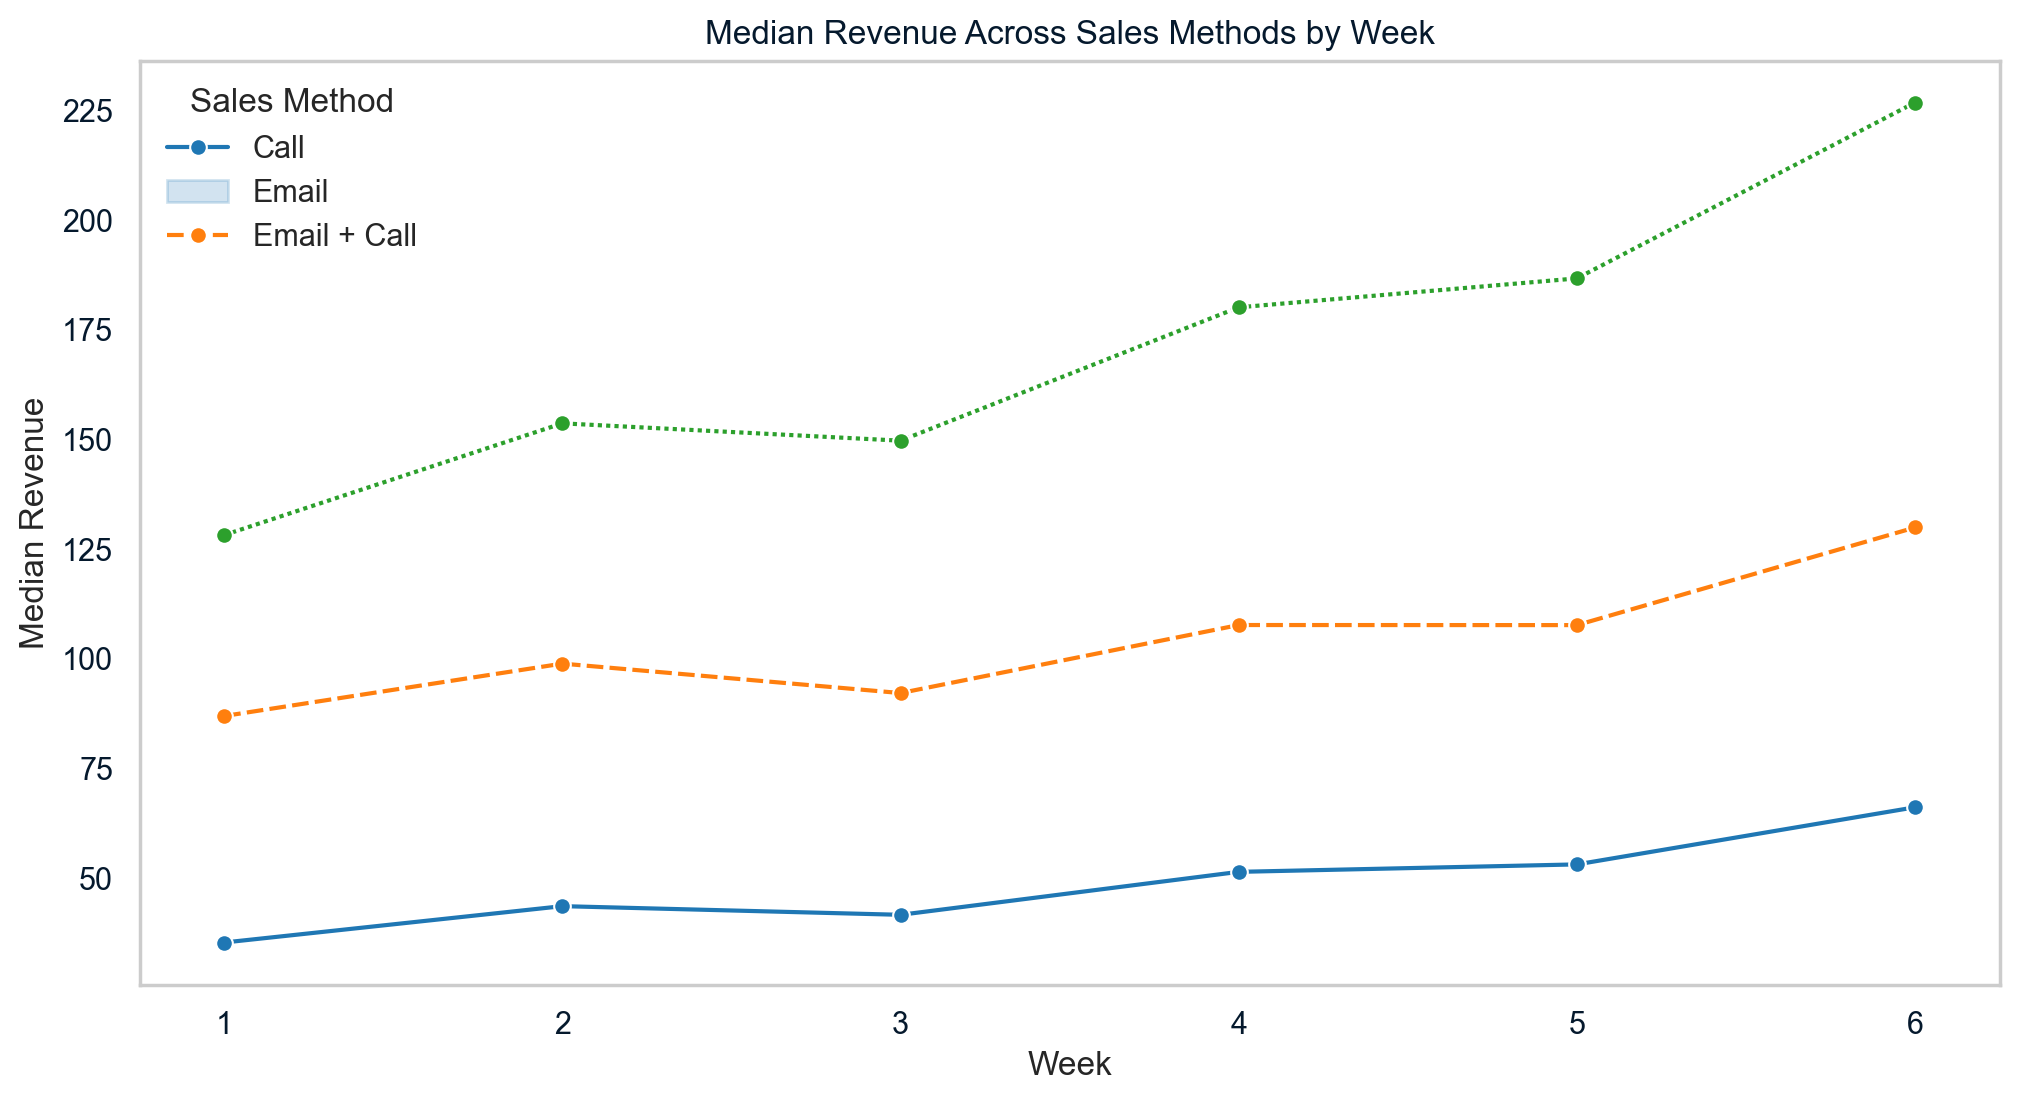

In [53]:
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]

# Plotting mean revenue for each sales method across weeks
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table.filter(like='mean'), marker='o')
plt.title('Mean Revenue Across Sales Methods by Week')
plt.ylabel('Mean Revenue')
plt.xlabel('Week')
plt.legend(title='Sales Method', labels=pivot_table.filter(like='mean').columns.str.replace('mean_', ''))
plt.grid()
plt.show()

# Plotting median revenue for each sales method across weeks
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table.filter(like='median'), marker='o', palette='tab10')
plt.title('Median Revenue Across Sales Methods by Week')
plt.ylabel('Median Revenue')
plt.xlabel('Week')
plt.legend(title='Sales Method', labels=pivot_table.filter(like='median').columns.str.replace('median_', ''))
plt.grid()
plt.show()

__Comment:__ The business should focus on Average Weekly Revenue per Sales Method as the primary metric. This metric provides a clear view of how much revenue each sales method generates on average during each week, offering actionable insights into the effectiveness of each approach. It aligns with the company’s goal of increasing revenue and profitability by selling more products. The metric can be regularly analyzed over time to monitor trends and adjust strategies if results deviate from expectations.

## 1. How Should the Business Monitor What They Want to Achieve?
1. Weekly Analysis:
- The business should track the average weekly revenue for each sales method (Call, Email, and Email + Call) at the end of each week. This allows them to identify performance trends early.
- Highlight the method with the highest average revenue each week to determine the most effective approach.

2. Trend Evaluation:
- Plot the weekly averages for each method to visually analyze revenue trends over time. This will help the business identify whether their preferred method (Email + Call) continues to trend upward.
- Compare the performance of Email + Call against other methods to ensure its superiority remains consistent.

3. Pivoting Strategy: If the average weekly revenue for the Email + Call method shows stagnation or decline, the business should investigate the cause (e.g., market saturation, ineffective communication) and consider improving the approach or exploring alternative methods.

## 2. Estimate of Initial Values for the Metric
Based on the current data, the initial values for Average Weekly Revenue per Sales Method for the Email + Call approach are as follows:

- Week 1: $124.87
- Week 2: $145.50
- Week 3: $144.91
- Week 4: $169.93
- Week 5: $174.37
- Week 6: $205.96

These values show a clear upward trend, with only a minor dip between weeks 2 and 3, which is quickly recovered in subsequent weeks.

# V. Final summary

Based on the analysis, here are a few key recommendations to optimize business performance:

1. Focus on the 'Email + Call' Method
- The Email + Call approach has proven to be highly successful. It demonstrated consistent growth over most weeks, with only a minor decline between weeks 2 and 3. 
- Additionally, it requires an average of just 10 minutes of phone time per customer, significantly less than the Call-only method. To maximize efficiency and revenue, the company should prioritize this strategy.

2. Leverage Targeted Email Campaigns
- While Email-only results were not as high as the Email + Call method, they still showed upward trends across the six-week period. Incorporating more targeted and value-driven emails into the strategy could be a low-effort way to add incremental revenue to the pipeline. 
- This approach offers a cost-effective way to supplement revenue generation with minimal additional workload.

3. Monitor Key Metrics
- The company should track the average weekly revenue per sales method as its primary performance indicator. This metric allows the team to observe trends over time, analyze results, and forecast future outcomes.
- Focusing on the two strongest methods (Email and Email + Call) will provide actionable insights and help the company adjust its strategy quickly if results do not align with revenue goals.

4. Reduce Focus on the 'Call-Only' Method
- The Call-only approach showed significantly lower results than other methods and was also far more time-intensive, requiring an average of 30 minutes per customer. 
- Given the poor performance and high time investment, the company should allocate fewer resources to this method and concentrate on the more effective approaches.

5. Improve Data Collection Practices
- The analysis revealed 1,074 missing revenue values, which were imputed to ensure data accuracy. However, these missing entries could impact results, so improving data collection practices is critical.
- Additionally, some outliers in the "years as customer" column, such as values exceeding 41 (the company's total years in business), indicate issues with data quality. For example, values like 47 and 63 were removed due to their inaccuracy. Moving forward, the team should ensure data validity and eliminate errors during collection.

6. A Multi-Channel Strategy
- To achieve its sales goals, the company should adopt a multi-channel approach. The Email + Call method delivers the highest return on time invested and could significantly enhance performance. 
- Combining this strategy with prompt follow-up calls—ideally within a day or two of sending a product information email—could boost sales conversions. Delayed follow-ups (e.g., a week later) often result in missed opportunities, as customers may not remember the email or fail to answer calls.

**Summary:** By focusing on proven approaches like Email + Call, enhancing email campaigns, and improving data accuracy, the company can optimize its operations and revenue generation. Prompt follow-ups and strategic execution will allow the team to outperform competitors and achieve its sales objectives. With the right focus, efforts, and tools, success is well within reach.